found geospatial data of the new york city subway stations and subway lines.
Learned how they are represented 
and experimented with them a little bit.

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib


In [2]:
stations=gpd.read_file("assets\\DOITT_SUBWAY_STATION_04JAN2017.zip")
lines=gpd.read_file("assets\\DOITT_SUBWAY_LINE_04JAN2017.zip")
countries=gpd.read_file("assets\\ne_110m_admin_0_countries.zip")

In [3]:
stations.head()


,OBJECTID,NAME,URL,LINE,NOTES,geometry
0,1,Astor Pl,http://web.mta.info/nyct/service/,4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s...",POINT (986725.002 205255.053)
1,2,Canal St,http://web.mta.info/nyct/service/,4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s...",POINT (984196.500 201155.840)
2,3,50th St,http://web.mta.info/nyct/service/,1-2,"1-all times, 2-nights",POINT (988724.216 216795.191)
3,4,Bergen St,http://web.mta.info/nyct/service/,2-3-4,"4-nights, 3-all other times, 2-all times",POINT (991184.246 187333.844)
4,5,Pennsylvania Ave,http://web.mta.info/nyct/service/,3-4,"4-nights, 3-all other times",POINT (1013411.541 181467.289)


In [4]:
lines.head()

,OBJECTID,ID,RT_SYMBOL,NAME,URL,SHAPE_LEN,geometry
0,753,2000393.0,G,G,http://web.mta.info/nyct/service/,2438.200249,"LINESTRING (985671.417 187092.953, 985837.975 ..."
1,754,2000394.0,G,G,http://web.mta.info/nyct/service/,3872.834411,"LINESTRING (989916.745 179707.597, 989894.632 ..."
2,755,2000469.0,N,Q,http://web.mta.info/nyct/service/,1843.366331,"LINESTRING (990957.018 149120.411, 990766.500 ..."
3,756,2000294.0,B,M,http://web.mta.info/nyct/service/,1919.559203,"LINESTRING (1005267.038 213365.645, 1005293.11..."
4,757,2000296.0,B,M,http://web.mta.info/nyct/service/,2385.698536,"LINESTRING (1008229.303 214782.238, 1009448.37..."


<AxesSubplot: >

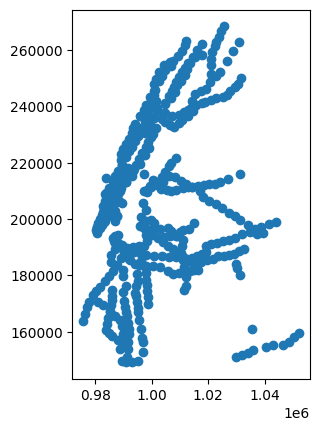

In [5]:
stations.plot()

<AxesSubplot: >

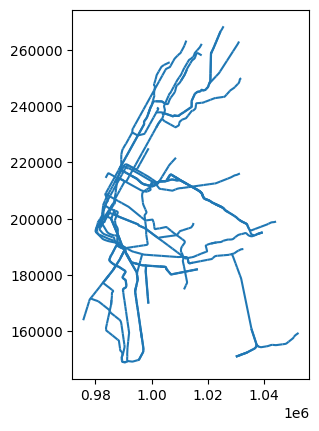

In [6]:
lines.plot()

In [7]:
stations.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [16]:
lines.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [8]:
#calculating distance between 2 stations in degrees

from shapely.geometry import Point
import geopandas as gpd
pnt1 = stations.loc[1]['geometry']
pnt2 = stations.loc[2]['geometry']
points_df = gpd.GeoDataFrame({'geometry': [pnt1, pnt2]}, crs='EPSG:2263')#

points_df.distance(points_df.shift())

0             NaN
1    16281.569644
dtype: float64